# codecentric.AI Bootcamp
## Praxis: Machine Learning Basics

Willkommen bei der Lektion zu Machine Learning Basics.

Um das Erklärvideo zu diesem Notebook zu laden, führe folgende Zelle aus:


In [ ]:
# lade Video
from IPython.display import IFrame    
IFrame('https://www.youtube.com/embed/xxx', width=850, height=650)

# Setup

Wir beginnen sehr einfach, um auch die Leute abzuholen, die nicht viel Python Erfahrung haben. 
Wenn Dir das Kapitel zu einfach erscheint - keine Sorge, im folgenden Kurs wird der Code noch anspruchsvoller ;)

Zunächst importieren wir die benötigten Libraries.

- numpy für effiziente Verarbeitung von multidimensionalen Arrays
- matplotlib um Daten zu Visualisieren

In [1]:
# magic Function, damit die matplotlib Visualisierungen im Jupyter Notebook angezeigt werden (und nicht in Extra Fenster)
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
import math
import random

# Fangen wir mal gaaaanz einfach an

Wir definieren eine **einfache** Funktion und generieren damit ein paar Datenpunkte. Wir nehmen absichtlich ein stark vereinfachtes Beispiel, weil wir zunächst nur prinzipiell zeigen wollen, wie Machine- und Deep-Learning funktioniert. In der Realität sind die Modelle, Features und Algorithmen natürlich komplexer - aber ganz abstrakt betrachtet kann man auch das komplexeste Deep Learning auf die Annäherung einer mathematischen Funktion zurück führen.


In diesem einfachen Beispiel soll das das Modell sein, was wir lernen wollen:

$$f(x)=1.5x^2 + 5 $$

Also eine Funktion mit quadratischen Eigenschaften. 

In [2]:
# zunächst definieren wir eine Funktion, die wir annähern wollen
f = lambda x: 1.5*x**2 + 5
num_datenpunkte = 8

Die lambda Schreibweise ist in Python eine anonyme Funktion - man hätte auch `def f(x): return 1.5 * x**2 + 5` schreiben können.

In [4]:
daten = np.array( [(x, f(x)) for x in range(num_datenpunkte)] )

# jetzt geben wir die ersten beiden Tupel aus. Die Notation [:3] könnte man auch als [0:3] schreiben und bedeutet hier: 
# Elemente von 0 bis nicht einschliesslich 3
print(daten[:3])

[[ 0.   5. ]
 [ 1.   6.5]
 [ 2.  11. ]]


Die Notation mit `[x for x in something]` ist ein sogenannte Python List Comprehension. Diese werden wir häufig verwenden und sehen. 
So können wir in einer kompakten Schreibweise Listen, Arrays und Dictionaries erzeugen.

Jetzt visualisieren wir die Daten mit Matplotlib.

Wir setzen die Parameter xlim und ylim um den Ursrpung des Koordinatensystems bei 0,0 beginnen zu lassen.

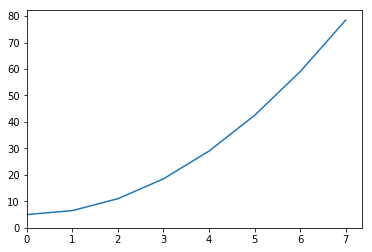

In [5]:
plt.plot(daten[:, 0], daten[:, 1])
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.show()

In [6]:
# jetzt generieren wir nocheinmal ähnliche Daten aber mit einer leichten Abweichung
# die Function random.randint(-2,2) liefert Zufallszahlen zwischen -2 und 2
noisy_daten = np.array( [(x, f(x) + random.randint(-2,2)*x) for x in range(num_datenpunkte)] )

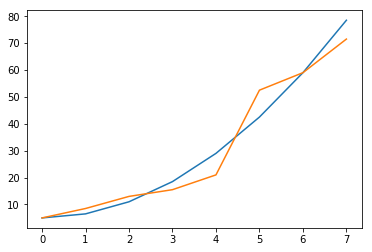

In [7]:
# und nun zeigen wir beides in einem Bild an
plt.plot(daten[:, 1])
plt.plot(noisy_daten[:, 1])

# Kosten Funktionen / Abweichung zwischen Modell und Daten messen

Jetzt übertragen wir dieses einfache Beispiel auf ein Problem, das wir mit Machine Learning lösen wollen.
Die "noisy_daten" sind dabei die Daten, die wir beobachtet haben (also unsere Labels). Im Alltag gibt es keine exakten Modelle - sondern Daten haben immer gewisse Abweichungen. Diese Daten könnten also zum Beispiel unsere Verkaufszahlen oder Daten eines Sensors sein.

Die Funktion f(x) ist dabei das Modell, das wir lernen wollen. Also das Prinzip hinter diesen Daten. (Normalerweise kennen wir dieses zugrunde liegende Modell natürlich nicht, sondern müssen es "lernen")

Ein einfacher Ansatz wäre nun, dass man einfach ein paar Modelle ausprobiert und versucht zu messen, wie gut dieses Modell zu unseren Labels passt. Um dies messen zu können, verwenden wir Kosten Funktionen. Beim Machine Learning macht man genau das gleiche - man probiert verschiedene Modelle und Parameter aus und misst wie gut das Ergebnis ist. Natürlich gibt es hier inzwischen sehr clevere Verfahren, wie man möglichst schnell und zielführend zu einem "optimalen" Modell kommt - aber dazu kommen wir später. Für den Anfang reicht es zu verstehen, dass man hier einfach verschiedene Sachen "ausprobiert" und vergleicht.

In [8]:
# einfache Fehler Funktion
fehler = lambda x, y: abs(x - y)

gesamt_fehler = 0

# für jeden Datenpunkt berechne die Abweichung zwischen Modell und noisy_daten
for i in range(num_datenpunkte):
    e = fehler(daten[i, 1], noisy_daten[i, 1])
    print("Abweichung bei x={0} ist: {1}".format(i, e))
    gesamt_fehler += e
    
print("Fehler insgesamt: {}".format(gesamt_fehler))

Abweichung bei x=0 ist: 0.0
Abweichung bei x=1 ist: 2.0
Abweichung bei x=2 ist: 2.0
Abweichung bei x=3 ist: 3.0
Abweichung bei x=4 ist: 8.0
Abweichung bei x=5 ist: 10.0
Abweichung bei x=6 ist: 0.0
Abweichung bei x=7 ist: 7.0
Fehler insgesamt: 32.0


### Das gleiche mit numpy

In dem obigen code Beispiel kann man sehr gut nachvollziehen was passiert. Für die Verarbeitung von großen Datenmengen sind solche `for loops` aber zu langsam. 

Deshalb wird im Bereich Machine Learning sehr viel mit `numpy` gearbeitet. Hier kann man hocheffizient Berechnung auch auf sehr großen Arrays machen. Die gleiche Berechnung des Fehlers wie oben können wir mit numpy auch wie folgt durchführen:

In [9]:
gesamt_fehler_numpy = np.sum(abs( daten[:, 1] - noisy_daten[:, 1]))

In [10]:
print(gesamt_fehler_numpy)

32.0


Zur Verdeutlichung generieren wir mal viele Daten und vergleichen die Laufzeit. Jetzt sieht man, dass die Vorgehensweise mit numpy um ein Vielfaches schneller ist.

In [11]:
many_datapoints = 10000000
numpy_1_big = np.random.rand(many_datapoints)
numpy_2_big = np.random.rand(many_datapoints)

In [12]:
%%time

gesamt_fehler_big = 0

for i in range(many_datapoints):
    e = fehler(numpy_1_big[i], numpy_2_big[i])
    gesamt_fehler_big += e
    
print("MAE Big Arrays: ", gesamt_fehler_big/many_datapoints)

MAE Big Arrays:  0.3333504666794795
CPU times: user 8.64 s, sys: 0 ns, total: 8.64 s
Wall time: 8.63 s


In [13]:
%%time

gesamt_fehler_numpy_big = np.sum(abs(numpy_1_big - numpy_2_big))

print("MAE Big Arrays: ", gesamt_fehler_numpy_big/many_datapoints)

MAE Big Arrays:  0.3333504666794593
CPU times: user 40 ms, sys: 20 ms, total: 60 ms
Wall time: 63.4 ms


## Zum Vergleich ein anderes Modell

Nachdem wir nun den Fehler von unserem Modell messen können, können wir auch verschiedene Modelle miteinanader vergleichen. Dazu definieren wir jetzt einfach irgendein weiteres Modell und messen/vergleichen den Fehler.

In [14]:
lineares_modell = lambda x: 2*x + 3

andere_daten = np.array( [(x, lineares_modell(x)) for x in range(num_datenpunkte)] )

gesamt_fehler_numpy_andere = np.sum(abs( andere_daten[:, 1] - noisy_daten[:, 1]))
print("Fehler anderes Modell ", gesamt_fehler_numpy_andere)
print("(zum Vergleich: {0})".format(gesamt_fehler_numpy))

Fehler anderes Modell  166.0
(zum Vergleich: 32.0)


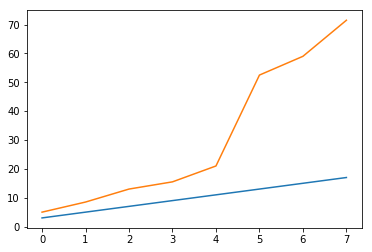

In [15]:
# hier noch eine Visualisierung mit dem linearen Modell
plt.plot(andere_daten[:, 1])
plt.plot(noisy_daten[:, 1])

### Fazit:

- Durch die Ermittlung des "Gesamten Fehlers" können wir die beiden Modelle einfach miteinander vergleichen.
- Wir sehen, dass der Fehler beim ersten Modell geringer ist als beim zweiten.
- In der Visualisierung können wir vermuten, dass unser lineares Modell hier "zu einfach" ist und nicht unsere Daten repräsentieren kann. Wobei man bei diesem Ausschnitt noch nicht genau sieht, dass die Daten nicht linear sind.

Aber wir wollen ja beim Machine Learning nicht manuell verschiedene Modelle und Parameter ausprobieren.
Bei diesem einfachen Beispiel ist das zwar noch möglich - in der Praxis sind Modelle aber viel komplexer und lassen sich nicht mehr intuitiv bestimmen. Dennoch sind die Prinzipien die gleichen - es geht darum Parameter "auszuprobieren" und den Fehler zu messen. Mit Hilfe von Kosten-Funktionen lassen sich effiziente Algorithmen implementieren, die die Parameter eines Modells iterativ annähern. Wir haben in diesem Beispiel die Summe der Absoluten Fehler zwischen dem Modell und den Labels verwendet. Diese wird natürlich immer größer, je mehr Datenpunkte wir "testen". Daher kann man diesen noch durch die Anzahl der Datenpunkte teilen und erhält so eine einfache Kostenfunktion: den **"Mean Absolute Error"**



In [ ]:
MAE_modell_1 = gesamt_fehler_numpy / num_datenpunkte
MAE_modell_2 = gesamt_fehler_numpy_andere / num_datenpunkte
print(MAE_modell_1, MAE_modell_2)

Die Formel dafür lautet:

$$MAE(X, f)=\frac1m \sum_{i=1}^m|f(x_i) - y_i|$$

- m ist dabei die Anzahl der Datenpunkte
- X ist ein "Array" mit bekannten Features und Labels (in diesem vereinfachten Fall sind die Features einfach x=1, 2, 3... etc.)
  - also zum Beispiel x1 = (3, 5, 8) <- Features
  - und y1 = (3) <- Label
- f ist unser Modell bzw. die Vorhersage-Funktion
- y sind die Labels 

# Generalisieren vs. Over- / Underfitting

Um besser zu verstehen, was Overfitting ist, versuchen wir absichtlich ein overfitted Modell zu erstellen.
Wir ermitteln eine Funktion, die möglichst durch alle unsere Trainingspunkte läuft. Dazu berechnen wir ein Polynom 7. Grades mit Hilfe von numpy.polyfit:

In [16]:
x = noisy_daten[:, 0]
y = noisy_daten[:, 1]

p = np.polyfit(x, y, 7)
f_poly = np.poly1d(p)

Die Funktion, die dabei heraus kommt sieht so aus:

In [17]:
print(f_poly)

         7       6         5         4         3         2
0.06944 x - 1.6 x + 14.36 x - 63.58 x + 145.1 x - 159.8 x + 69 x + 5


Jetzt berechnen wir mit dieser Funktion einige Datenpunkte, um diese dann zu visualisieren:

In [18]:
# np.linspace erzeugt hier 100 Datenpunkte zwischen dem ersten und dem letzten x Wert
x_poly = np.linspace(x[0], x[-1], 100)
# mit diesen x Werten berechnen wir den Verlauf der Funktion
y_poly = f_poly(x_poly)

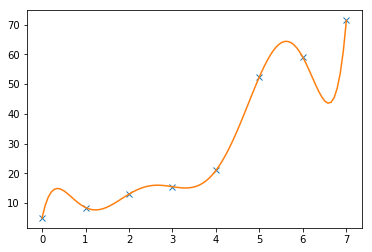

In [19]:
# und jetzt visualisieren wir den Verlauf und markieren die eigentlichen Labels mit einem "x"
plt.plot(x, y, 'x', x_poly, y_poly)

Wir sehen schon, dass die Funktion genau durch die x Punkte läuft - d.h. es ist zu erwarten, dass unser Fehler sehr klein ist. Zur Kontrolle berechnen wir den Fehler:

In [20]:
overfitted_daten = np.array( [(x, f_poly(x)) for x in range(num_datenpunkte)] )

In [22]:
gesamt_fehler_overfitted = np.sum(abs( overfitted_daten[:, 1] - noisy_daten[:, 1]))
print("Mean Absolute Error {0:.12f}".format(gesamt_fehler_overfitted/num_datenpunkte))

Mean Absolute Error 0.000000000029


Der Fehler des overfitting Modells ist geringer (nahe 0) als der von unserem idealen Modell - **aber nur im Bereich von unseren Trainingsdaten (den Datenpunkten)**. Das Modell hat qausi die Datenpunkte auswendig gelernt und nicht das Konzept hinter den Daten.

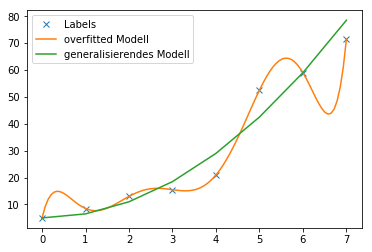

In [23]:
plt.plot(x, y, 'x', x_poly, y_poly)
plt.plot(daten[:, 1])
plt.legend(["Labels", "overfitted Modell", "generalisierendes Modell"])

Betrachten wir nun einen Punkt der nicht in den Trainingsdaten liegt, sehen wir, wie schlecht das Modell trotz des geringen Fehlers ist:

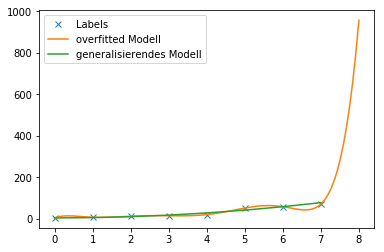

In [24]:
# wir erzeugen nochmal Daten, gehen aber über die Trainingsdaten hinaus (+1)
x_poly = np.linspace(x[0], x[-1] + 1, 100)
y_poly = f_poly(x_poly)
plt.plot(x, y, 'x', x_poly, y_poly)
plt.plot(daten[:, 1])
plt.legend(["Labels", "overfitted Modell", "generalisierendes Modell"])

### Fazit:

- Overfitting kann bedeuten,dass mein Fehler zwar sehr klein wird, aber mein Modell trotzdem nicht gut ist 
- es funktioniert nur auf den Trainingsdaten
- es generalisiert nicht


Im Vergleich dazu nocheinmal "Underfitting", was wiederum bedeutet, dass mein Modell zu einfach ist. Dazu erstellen wir eine lineare Funktion, wo wir wissen, dass diese niemals die quadratischen Eigenschaften unserer Daten abbilden kann:

In [25]:
# unsere Funktion soll ungefähr durch diese Punkte laufen:
(x1, y1), (x2, y2) = noisy_daten[0], noisy_daten[-1]
print(x1, y1, x2, y2)

# daraus folgt ein Modell: 
f_underfitting = lambda x: ( (y2-y1)/x2 ) * x + y1

0.0 5.0 7.0 71.5


In [26]:
underfitted_daten = np.array( [(x, f_underfitting(x)) for x in range(num_datenpunkte)] )

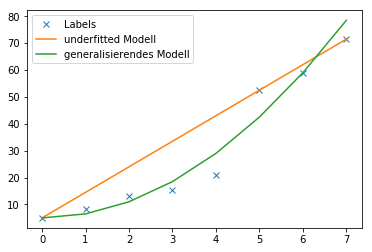

In [27]:
plt.plot(x, y, 'x', underfitted_daten[:, 1])
plt.plot(daten[:, 1])
plt.legend(["Labels", "underfitted Modell", "generalisierendes Modell"])

### Fazit: 

Auch hier sehen wir, dass der Fehler im Bereich der Trainingsdaten nicht sehr groß sein wird. Aber man kann sich aber leicht vorstellen, dass die Abweichungen für größere Werte von x sehr groß werden. Das zu einfache Modell wird niemals in der Lage sein, unsere fiktiven Daten mit quadratischen Eigenschaften über einen großen Wertebereich gut vorherzusagen.

# Daten splitten und Modelle messen

Also was macht man nun gegen Overfitting und Underfitting - und vor allem wie merkt man, wie es um sein aktuelles Modell bestellt ist? Bei unserem einfachen Beispiel lässt sich das noch ganz gut visualisieren und intuitiv bewerten - in der Praxis sind dafür die Modelle aber meist zu komplex.

Im Prinzip geht man in der Praxis wie folgt vor:

- Teile die Daten auf (Traininsset, Validationset, Testset)
- Trainiere dein Modell nur mit den Trainingsdaten
- Messe den Fehler auf den Trainingsdaten -> fehler(train)
- nach einigen Durchläufen: Messe den Fehler auf dem Validationset (also auf Daten, die das Modell nicht "kennt")

Durch Vergleich der Werte fehler(train) und fehler(val) kann man darauf zurückschließen wie gut oder schlecht ein Modell generalisiert. 

Das Testset ist noch ein Spezialfall um ganz am Ende eine ungeschönte Qualitätsaussage über das Modell zu machen. Im Prinzip darf man es nur 1 mal verwenden, um sein Modell zu messen und danach nicht mehr optimieren. Man könnte natürlich weiter für das Testset optimieren und damit auch seine Werte verbessern - aber das ist ein bisschen wie schummeln und daher nicht aussagekräftig.



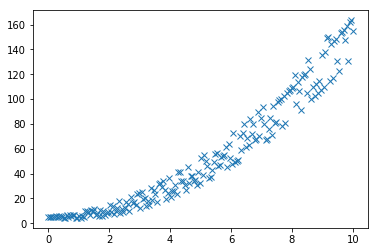

In [28]:
# jetzt brauchen wir etwas mehr Daten als vorher, damit wir was zum aufteilen haben
# wir generieren zunächst 200 x-werte zwischen 0 und 10
num_x = num_x = 200
x_werte = np.linspace(0, 10, num_x)

# nun erzeugen wir die daten wieder mit einer leichten Abweichung zu unserem Modell
mehr_daten = np.array( [(x, f(x) + random.randint(-2,2)*x) for x in x_werte] )

plt.plot(mehr_daten[:,0], mehr_daten[:,1], "x")

In [29]:
# wir mischen die Daten durch, damit die Daten zufällig verteilt sind
np.random.shuffle(mehr_daten)

# wir definieren einen Split bei 90 % (also 90 % Training, 10 % Validation). Üblich sind Werte zwischen 80-90% je nach Daten.
split = int(num_x * (0.9))

# jetzt splitten wir die Daten auf - mit numpy slicing ganz einfach:
train, val = mehr_daten[:split,:], mehr_daten[split:,:]

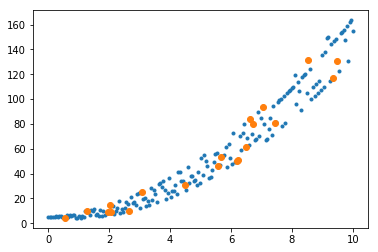

In [30]:
# Anzeige der Trainingsdaten kleinere Punkte
plt.plot(train[:, 0], train[:, 1], ".")
# Anzeige der Evaldaten als größere Punkte
plt.plot(val[:, 0], val[:, 1], "o")

Mit einem Modell und einer Fehler Funktion kann man nun den Fehler für die Trainingsdaten und für die Eval Daten berechnen und miteinander vergleichen. Hier kommt es vor allem auch auf den Trend der Werte in mehreren Trainingsrunden an.

Am Anfang ist zu erwarten, dass sowohl fehler(train) als auch fehler(val) mehr oder weniger gleichmäßig kleiner werden. Dies bedeutet das Modell wird besser bzw. "lernt" etwas. Erreicht man dann einen Punkt, wo fehler(train) weiterhin kleiner wird aber fehler(val) gleich bleibt oder sogar größer wird beginnt das Modell zu overfitten. An dieser Stelle lernt das Modell nicht mehr das Konzept der Trainingsdaten sondern die Traingsdaten selbst.

Schauen wir uns einen fiktiven Trainingsverlauf an:

| Trainingsrunde | fehler(train) | fehler(val)    |
|----------------|---------------|----------------|
|   1            | 17,4          | 20,3           |
|   2            | 14,4          | 17,2           |
|   3            | 8,4           | 10,5           |
|   4            | 2,4           |  4,1           |
|   5            | 1,4           |  6,1           | 
|   6            | 0,4           |  8,2           |

Hier sehen wir, dass ab Runde 5 ein Overfitting beginnt. fehler(train) fällt weiter deutlich während fehler(val) wieder steigt. Das Modell kann also auf unbekannten Daten verhältnismäßig schlechter vorhersagen als auf bekannten Daten. Was wiederum bedeutet, dass es nicht mehr so gut generalisiert. Das ist in der Regel ein guter Zeitpunkt, um mit dem Training aufzuhören. Wenn man diesen Punkt nie erreicht, dann bedeutet das wahrscheinlich, dass das Modell zu einfach ist.

An dieser Stelle führt uns unser vereinfachtes Beispiel nicht mehr weiter (wir müssten zu viel selbst implementieren). Ab hier werden wir uns mit "richtigen" Datesets und mit Machine Learning Frameworks auseinander setzen. Aber diese Konzepte werden uns bald wieder begegnen.

# Hands On! Klassifikation 

Ok, das war jetzt viel Theorie ohne konkreten Praxis Bezug ... das wollen wir ändern. Jetzt starten wir gleich richtig durch. Wir laden ein Dataset und klassifizieren Bilder. Wir verwenden dazu Keras, TensorFlow und Neuronale Netze. Was das genau bedeutet sei an dieser Stelle unwichtig - wir werden aber die einfachen Konzepte von vorher wieder finden.

Wichtig hier ist zu sehen, dass die Prinzipien von unserem stark vereinfachten Beispiel auch direkt auf komplexes Deep Learning mit neuronalen Netzen übertragen können. Es funktioniert ganz ähnlich - nur die mathematischen Funktionen sind komplexer und es gibt viel mehr Parameter. Diese Komplexität wird für den User aber durch einfach anzuwendende Frameworks abstrahiert ...

Ich zeige euch jetzt einfach den Code und wie man Bilder mit neuronalen Netzen klassifiziert. Was das genau bedeutet schauen wir uns in einem späteren Kapitel genauer an.

In [31]:
from keras import *
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import RMSprop
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

Using TensorFlow backend.


In [32]:
fruit_list = ["Kiwi", "Banana", "Plum", "Apricot", "Avocado", "Cocos", "Clementine", "Mandarine", "Orange",
                "Limes", "Lemon", "Peach", "Plum", "Raspberry", "Strawberry", "Pineapple", "Pomegranate"]
output_n = len(fruit_list)
size = 20
img_width = 20
img_height = 20
channels = 3
train_image_files_path = "/data/fruits-360/Training/"
valid_image_files_path = "/data/fruits-360/Test/"

In [33]:
beispiel_bilder = !find $train_image_files_path -type f

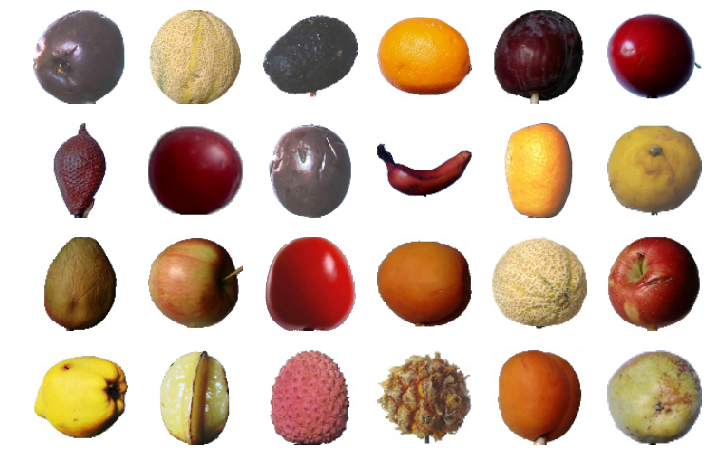

In [35]:
num_beispiel_bilder = 24
beispiel_bilder = random.sample(beispiel_bilder, num_beispiel_bilder)

fig = plt.figure(figsize=(12,8))

for i in range(num_beispiel_bilder):
    fig.add_subplot(4, 6, i + 1)
    plt.axis('off')
    img = plt.imread(beispiel_bilder[i])
    plt.imshow(img)

In [36]:
train_data_gen = ImageDataGenerator(
    rescale = 1 / 255 #,
)

valid_data_gen = ImageDataGenerator(
    rescale = 1 / 255
)

train_image_array_gen = train_data_gen.flow_from_directory(
        train_image_files_path,
        target_size = (img_width, img_height),
        class_mode = 'categorical',
        classes = fruit_list,
        seed = 42)

valid_image_array_gen = valid_data_gen.flow_from_directory(
        valid_image_files_path,
        target_size = (img_width, img_height),
        class_mode = 'categorical',
        classes = fruit_list,
        seed = 42)

Found 8156 images belonging to 17 classes.
Found 2743 images belonging to 17 classes.


In [37]:
train_samples = train_image_array_gen.n
valid_samples = valid_image_array_gen.n
print(train_samples, valid_samples)

batch_size = 32
epochs = 10

8156 2743


In [38]:
model = Sequential()

# first hidden layer
model.add(Conv2D(32, (3, 3), padding = "same", input_shape = (img_width, img_height, channels)))
model.add(Activation('relu'))

# second hidden layer
model.add(Conv2D(16, (3, 3), padding = "same"))
model.add(LeakyReLU(alpha = 0.5))
model.add(BatchNormalization())

# max pooling
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

# Flatten max filtered output into feature vector 
# and feed into dense layer
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Outputs from dense layer are projected onto output layer
model.add(Dense(output_n))
model.add(Activation('softmax'))

In [39]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = RMSprop(lr = 0.0001, decay = 1e-6),
              metrics = ['accuracy'])

In [40]:
history = model.fit_generator(
    train_image_array_gen,
    steps_per_epoch = int(train_samples / batch_size), 
    epochs = epochs, 
    validation_data = valid_image_array_gen,
    validation_steps = int(valid_samples / batch_size),
    verbose = 1
)

Epoch 1/10
254/254 [==============================] - 89s 350ms/step - loss: 0.8797 - acc: 0.7238 - val_loss: 0.1668 - val_acc: 0.9610
Epoch 2/10
254/254 [==============================] - 63s 248ms/step - loss: 0.1390 - acc: 0.9577 - val_loss: 0.0804 - val_acc: 0.9782
Epoch 3/10
254/254 [==============================] - 62s 243ms/step - loss: 0.0571 - acc: 0.9830 - val_loss: 0.0532 - val_acc: 0.9764
Epoch 4/10
254/254 [==============================] - 63s 246ms/step - loss: 0.0269 - acc: 0.9928 - val_loss: 0.0518 - val_acc: 0.9816
Epoch 5/10
254/254 [==============================] - 60s 236ms/step - loss: 0.0144 - acc: 0.9962 - val_loss: 0.0067 - val_acc: 0.9993
Epoch 6/10
254/254 [==============================] - 62s 243ms/step - loss: 0.0107 - acc: 0.9974 - val_loss: 0.0786 - val_acc: 0.9757
Epoch 7/10
254/254 [==============================] - 60s 236ms/step - loss: 0.0043 - acc: 0.9991 - val_loss: 0.0095 - val_acc: 0.9959
Epoch 8/10
254/254 [==============================] - 5

## Accuracy messen

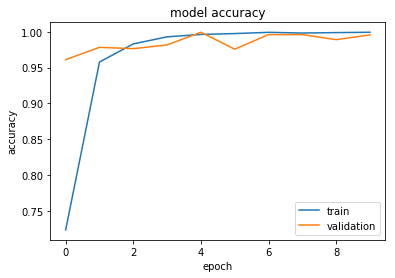

In [41]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'lower right')

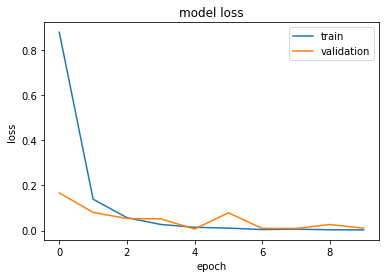

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')

## Fazit:

Mit ein paar Zeilen Code haben wir:

- ein Datenset mit Labels geladen
- eine mathematische Funktion mit vielen Parametern definiert (in dem Fall ein neuronales Netz)
- eine Kostenfunktion definiert (in dem Fall loss = categorical_crossentropy)
- iterativ ein Modell trainiert (mit model.fit())
- verschiedene Modelle miteinander verglichen (Auswertung von Training Accuracy und Validation Accuracy)

### Resultat:

Die Validation Accuracy liegt bei > 99,9%. Das heisst mit diesem einfachen Code und ein paar Minuten Trainingszeit konnten wir eine Bild Klassifikation durchführen, die von unseren knapp 3000 Bildern aus dem Validation Set über 99,9% richtig in eine von 81 Klassen einsortiert.

Dieses Beispiel ist einfach übertragbar auf alle möglichen Bereiche. Auf genau die gleiche Art und Weise könnte man:

- gute von fehlerhaften Bauteilen unterscheiden
- medizinische Bilder auswerten
- Objekte in Qualitätsstufen einsortieren
- Fotos automatisch kategorisieren

... man muss "nur" die Bilder und die Labels bereitstellen.
